Preprocessing Data 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 


In [62]:
file_path = "../data/raw_data/stroke_dataset.csv"
df = pd.read_csv(file_path)
df = df.drop(['Patient ID', 'Patient Name'], axis=1)

df.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [63]:
df.isnull().sum()

Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [64]:
df['Symptoms'] = df['Symptoms'].fillna('No Symptoms')

In [65]:
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

In [66]:
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(exclude=['object'])

print(f'Categorical Data list : {categorical_data.columns}')
print(f'Numerical Data list : {numerical_data.columns}')

Categorical Data list : Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Blood Pressure Levels',
       'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')
Numerical Data list : Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels'],
      dtype='object')


In [67]:
df[['HDL', 'LDL']] = df["Cholesterol Levels"].str.split(",", expand=True)
df['HDL'] = df['HDL'].str.split(':', expand=True)[1]
df['LDL'] = df['LDL'].str.split(':', expand=True)[1]
df['HDL'] = pd.to_numeric(df['HDL'])
df['LDL'] = pd.to_numeric(df['LDL'])
df.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis,HDL,LDL
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke,68,133
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke,63,70
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke,59,95
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,70,137
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke,65,68


In [68]:
df['Upper BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[0]
df['Lower BP'] = df['Blood Pressure Levels'].str.split('/',expand=True)[1]
df['Upper BP'] = pd.to_numeric(df['Upper BP'])
df['Lower BP'] = pd.to_numeric(df['Lower BP'])

In [69]:
df = df.drop(['Blood Pressure Levels', 'Cholesterol Levels','Symptoms'], axis=1)

df.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis,HDL,LDL,Upper BP,Lower BP
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,Moderate,0,Yes,Vegan,3.48,Stroke,68,133,140,108
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,Low,0,No,Paleo,1.73,Stroke,63,70,146,91
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,High,0,Yes,Paleo,7.31,Stroke,59,95,154,97
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,Moderate,0,No,Paleo,5.35,No Stroke,70,137,174,81
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,Low,0,Yes,Pescatarian,6.84,Stroke,65,68,121,95


In [70]:

binary_cols = ['Gender', 'Marital Status', 'Family History of Stroke','Residence Type','Diagnosis']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

onehot_cols = ['Smoking Status', 'Alcohol Intake', 'Physical Activity','Dietary Habits','Work Type']
encoder = OneHotEncoder(drop='first', sparse_output=False)  

encoded_data = encoder.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(onehot_cols))

df = df.drop(columns=onehot_cols)
df = pd.concat([df, encoded_df], axis=1)

df.head()


,Age,Gender,Hypertension,Heart Disease,Marital Status,Residence Type,Average Glucose Level,Body Mass Index (BMI),Stroke History,Family History of Stroke,...,Physical Activity_Moderate,Dietary Habits_Keto,Dietary Habits_Non-Vegetarian,Dietary Habits_Paleo,Dietary Habits_Pescatarian,Dietary Habits_Vegan,Dietary Habits_Vegetarian,Work Type_Never Worked,Work Type_Private,Work Type_Self-employed
0,56,1,0,1,1,0,130.91,22.37,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,80,1,0,0,2,1,183.73,32.57,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,26,1,1,1,1,0,189.00,20.32,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,73,1,0,0,1,1,185.29,27.50,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,51,1,1,1,0,1,177.34,29.06,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(exclude=['object'])

print(f'Categorical Data list : {categorical_data.columns}')
print(f'Numerical Data list : {numerical_data.columns}')

Categorical Data list : Index([], dtype='object')
Numerical Data list : Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Residence Type', 'Average Glucose Level', 'Body Mass Index (BMI)',
       'Stroke History', 'Family History of Stroke', 'Stress Levels',
       'Diagnosis', 'HDL', 'LDL', 'Upper BP', 'Lower BP',
       'Smoking Status_Formerly Smoked', 'Smoking Status_Non-smoker',
       'Alcohol Intake_Never', 'Alcohol Intake_Rarely',
       'Alcohol Intake_Social Drinker', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Keto',
       'Dietary Habits_Non-Vegetarian', 'Dietary Habits_Paleo',
       'Dietary Habits_Pescatarian', 'Dietary Habits_Vegan',
       'Dietary Habits_Vegetarian', 'Work Type_Never Worked',
       'Work Type_Private', 'Work Type_Self-employed'],
      dtype='object')


In [72]:
# Generate sample data
np.random.seed(42)
data = pd.Series(np.concatenate([
    np.random.normal(0, 1, 100),
    np.array([10, -10, 15, -15])
]))

# Define outlier detection function
def find_outliers(data, column_name=None):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }


In [73]:
# Calculate outliers
results = find_outliers(data, 'Example Data')
results

{'Q1': np.float64(-0.6125598978233288),
 'Q3': np.float64(0.5008524730367635),
 'IQR': np.float64(1.1134123708600923),
 'lower_bound': np.float64(-2.282678454113467),
 'upper_bound': np.float64(2.170971029326902),
 'outliers': 74     -2.619745
 100    10.000000
 101   -10.000000
 102    15.000000
 103   -15.000000
 dtype: float64}

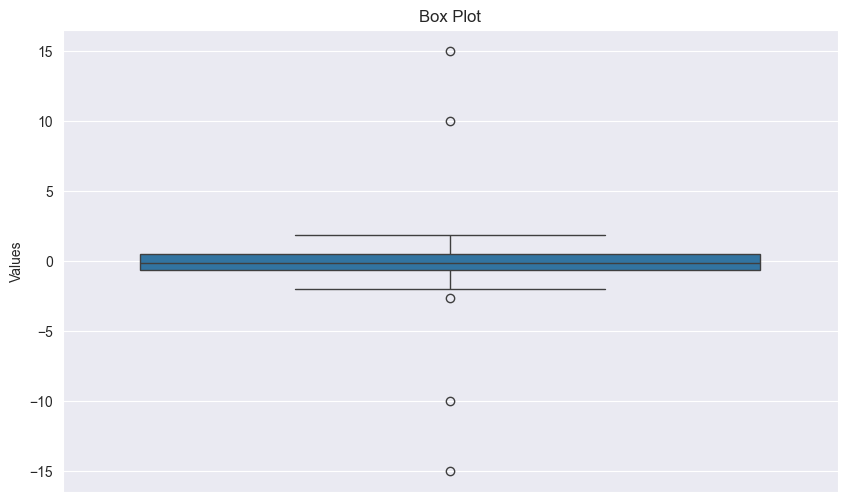

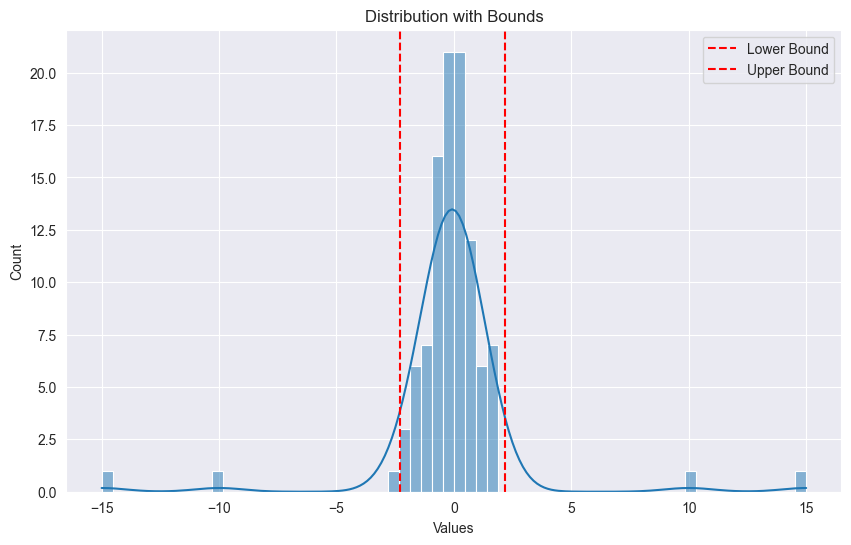

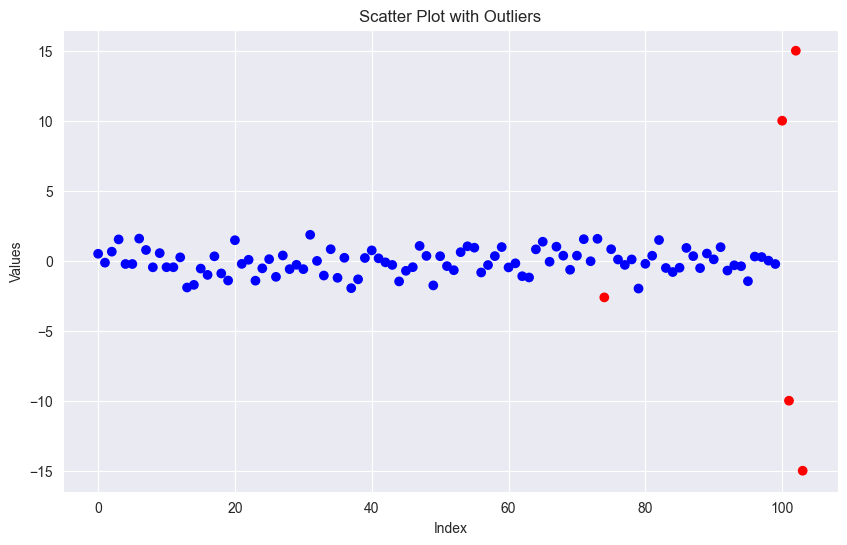

Number of outliers: 5
Outlier values:
[ -2.6197451  10.        -10.         15.        -15.       ]


In [74]:
# Visualization 1: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data)
plt.title('Box Plot')
plt.ylabel('Values')
plt.show()

# Visualization 2: Distribution with Bounds
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True)
plt.axvline(results['lower_bound'], color='r', linestyle='--', label='Lower Bound')
plt.axvline(results['upper_bound'], color='r', linestyle='--', label='Upper Bound')
plt.title('Distribution with Bounds')
plt.xlabel('Values')
plt.legend()
plt.show()

# Visualization 3: Scatter Plot with Outliers
plt.figure(figsize=(10, 6))
mask = (data < results['lower_bound']) | (data > results['upper_bound'])
plt.scatter(range(len(data)), data, c=['red' if m else 'blue' for m in mask])
plt.title('Scatter Plot with Outliers')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()

# Print summary statistics
print(f"Number of outliers: {len(results['outliers'])}")
print(f"Outlier values:\n{results['outliers'].values}")

In [75]:
target='Diagnosis'
y=df[target]
X=df.drop(columns=[target], axis=1)
y.value_counts()


Diagnosis
0    7532
1    7468
Name: count, dtype: int64

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Scaling the data using Standard Scaler for 0 mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [77]:
column_names = df.columns.difference(["Diagnosis"]).tolist()
column_names

['Age',
 'Alcohol Intake_Never',
 'Alcohol Intake_Rarely',
 'Alcohol Intake_Social Drinker',
 'Average Glucose Level',
 'Body Mass Index (BMI)',
 'Dietary Habits_Keto',
 'Dietary Habits_Non-Vegetarian',
 'Dietary Habits_Paleo',
 'Dietary Habits_Pescatarian',
 'Dietary Habits_Vegan',
 'Dietary Habits_Vegetarian',
 'Family History of Stroke',
 'Gender',
 'HDL',
 'Heart Disease',
 'Hypertension',
 'LDL',
 'Lower BP',
 'Marital Status',
 'Physical Activity_Low',
 'Physical Activity_Moderate',
 'Residence Type',
 'Smoking Status_Formerly Smoked',
 'Smoking Status_Non-smoker',
 'Stress Levels',
 'Stroke History',
 'Upper BP',
 'Work Type_Never Worked',
 'Work Type_Private',
 'Work Type_Self-employed']

In [78]:

# # Combine scaled features and labels for training data
X_train_df = pd.DataFrame(X_train_scaled, columns=column_names)
X_train_df.to_csv('../data/processed_data/train/X_train.csv')
y_train_df = pd.DataFrame(y_train, columns=['Diagnosis'])
y_train_df.to_csv('../data/processed_data/train/Y_train.csv')

train_combined = pd.concat([X_train_df, y_train_df], axis=1)

# Combine scaled features and labels for test data
X_test_df = pd.DataFrame(X_test_scaled, columns=column_names)
X_test_df.to_csv('../data/processed_data/test/X_test.csv')

y_test_df = pd.DataFrame(y_test, columns=['Diagnosis'])
y_test_df.to_csv('../data/processed_data/test/Y_test.csv')


# test_combined = pd.concat([X_test_df, y_test_df], axis=1)

# Save combined datasets to CSV
# train_combined.to_csv("../data/processed_data/train_data.csv", index=False)
# test_combined.to_csv("../data/processed_data/test_data.csv", index=False)